In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [2]:
def PolarToRect(AbsValue, Phase):
    return(AbsValue * (math.cos(Phase) + math.sin(Phase)*1j))

In [3]:
'''def ComputeComplexFunction(K_magnitude,K_phase):	
# Define the matrix to hold the Complex Function Values
    Complex_Matrix = []
# Define the matrix row for Complex Function Values
    Complex_Row = []
# For each of the row of the magnitude entries
    for i in range(len(K_magnitude)):
# For each of the column of the magnitude entries
        for j in range(len(K_magnitude[i])):
# Compute the Complex Function using the corresponding Phase entry
            Complex_Row.append(PolarToRect(K_magnitude[i][j],K_phase[i][j]))
# Append the Complex number to the 
        Complex_Matrix.append(Complex_Row)
        Complex_Row = []
# Return the complex value matrix
    return(Complex_Matrix)'''

'def ComputeComplexFunction(K_magnitude,K_phase):\t\n# Define the matrix to hold the Complex Function Values\n    Complex_Matrix = []\n# Define the matrix row for Complex Function Values\n    Complex_Row = []\n# For each of the row of the magnitude entries\n    for i in range(len(K_magnitude)):\n# For each of the column of the magnitude entries\n        for j in range(len(K_magnitude[i])):\n# Compute the Complex Function using the corresponding Phase entry\n            Complex_Row.append(PolarToRect(K_magnitude[i][j],K_phase[i][j]))\n# Append the Complex number to the \n        Complex_Matrix.append(Complex_Row)\n        Complex_Row = []\n# Return the complex value matrix\n    return(Complex_Matrix)'

In [4]:
#build complex function K
def ComputeComplexFunction(K_magnitude,K_phase):
    Complex_Func = np.zeros(K_phase.shape,dtype=complex)
    for i in range(K_phase.shape[0]):
        for j in range(K_phase.shape[1]):
            Complex_Func[i][j] = cmath.rect(K_magnitude[i][j], K_phase[i][j])
    return Complex_Func

In [5]:
#input images\n   
img_g = plt.imread('./resources/bauckhage.jpg')  
img_h = plt.imread('./resources/clock.jpg')  

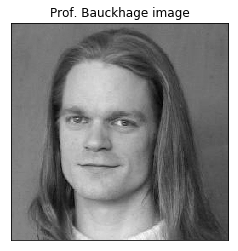

In [6]:
plt.imshow(img_g, cmap='gray', interpolation='nearest')
plt.title('Prof. Bauckhage image')
plt.xticks([])
plt.yticks([])
plt.show()

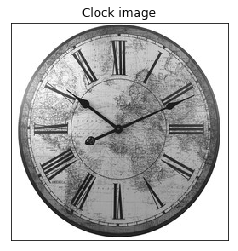

In [7]:
plt.imshow(img_h, cmap='gray', interpolation='nearest')
plt.title('Clock image')
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
#check if the dimensions of both images are the same   
if img_g.shape != img_h.shape:  
    print("The Images are not of the same size  please try again!")   
    exit()

In [9]:
#compute the Fourier Transform of the two 2-dimensional functions\  
func_G = np.fft.fft2(img_g) 
func_H = np.fft.fft2(img_h)

#shift zero frequencies to the center
shift_G = np.fft.fftshift(func_G)
shift_H = np.fft.fftshift(func_H)

#compute the logarithm of absolute values for visualization
vis_G = np.log10(abs(shift_G))
vis_H = np.log10(abs(shift_H))

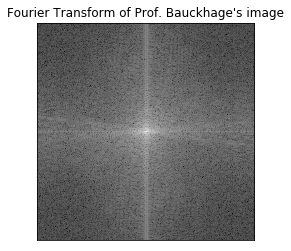

In [10]:
#plotting Prof. Bauckhage image Fourier Transform
plt.imshow(vis_G, cmap='gray', interpolation='nearest')
plt.title('Fourier Transform of Prof. Bauckhage\'s image')
plt.xticks([])
plt.yticks([])
plt.show()

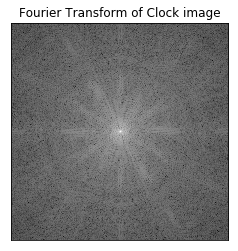

In [11]:
#plotting Clock image Fourier Transform
plt.imshow(vis_H, cmap='gray', interpolation='nearest')
plt.title('Fourier Transform of Clock image')
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
#prepare the magnitude and phase for the new Function K  
magnitude_K = np.absolute(func_G) 
phase_K = np.angle(func_H) 

In [13]:
#Call the function to get the complex value matrix using the magnitude and phase values
func_K = ComputeComplexFunction(magnitude_K,phase_K)

#shift zero frequencies to the top left
shift_K = np.fft.ifftshift(func_K)

#compute the logarithm of absolute values for visualization
vis_K = np.log10(abs(shift_K))

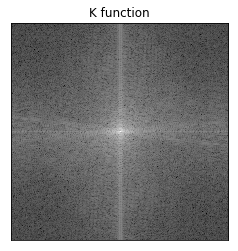

In [14]:
#Plotting K function
plt.imshow(vis_K, cmap='gray', interpolation='nearest')
plt.title('K function')
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
#Inverse Fourier Transform
inverse_K = np.fft.ifft2(shift_K)

#compute absolute value of complex number
final_K = np.abs(inverse_K)

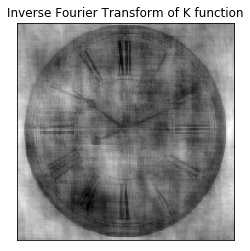

In [16]:
#Plotting Inverse Fourier Transform of K function
plt.imshow(final_K, cmap='gray', interpolation='nearest')
plt.title('Inverse Fourier Transform of K function')
plt.xticks([])
plt.yticks([])
plt.show()

As the phase contains more information about the image than the magnitude does, the final image is more similar to the image, from which the phase comes! (In this case clock image)